# PCA - practical2.1 

## Question A

### 1. Reduce the dimension of the Dataset_1 (using PCA)

#### input data from csv file

In [106]:
import pandas as pd
Dataset_1 = pd.read_csv('Eating_In_the_UK.csv')
Dataset_1

,Unnamed: 0,England,N. Ireland,Scotland,Wales
0,Alcoholic drinks,375,135,458,475
1,Beverages,57,47,53,73
2,Carcase meat,245,267,242,227
3,Cereals,1472,1494,1462,1582
4,Cheese,105,66,103,103
5,Confectionery,54,41,62,64
6,Fat and Oils,193,209,184,235
7,Fish,147,93,122,160
8,Fresh fruit,1102,674,957,1137
9,Fresh potatoes,720,1033,566,874


using index to set first column as index

In [107]:
Dataset_1 = pd.read_csv('Eating_In_the_UK.csv',index_col=0)
Dataset_1

,England,N. Ireland,Scotland,Wales
Alcoholic drinks,375,135,458,475
Beverages,57,47,53,73
Carcase meat,245,267,242,227
Cereals,1472,1494,1462,1582
Cheese,105,66,103,103
Confectionery,54,41,62,64
Fat and Oils,193,209,184,235
Fish,147,93,122,160
Fresh fruit,1102,674,957,1137
Fresh potatoes,720,1033,566,874


Transform the Dataset: Cause we want to reduce the feature are Alcoholic drinks.... not the county

In [108]:
Dataset_1 = Dataset_1.T
Dataset_1

,Alcoholic drinks,Beverages,Carcase meat,Cereals,Cheese,Confectionery,Fat and Oils,Fish,Fresh fruit,Fresh potatoes,Fresh veg,Other meat,Other veg,Processed potatoes,Processed veg,Soft drinks,Sugars
England,375,57,245,1472,105,54,193,147,1102,720,253,685,488,198,360,1374,156
N. Ireland,135,47,267,1494,66,41,209,93,674,1033,143,586,355,187,334,1506,139
Scotland,458,53,242,1462,103,62,184,122,957,566,171,750,418,220,337,1572,147
Wales,475,73,227,1582,103,64,235,160,1137,874,265,803,570,203,365,1256,175


#### Using PCA to reduce the Dataset

In [109]:
from sklearn.decomposition import PCA
pca = PCA() #set PCA function
Dataset_1_pca = pca.fit_transform(Dataset_1) #fit the dataset into the algorithm
Dataset_1_pca

array([[-1.44993152e+02, -2.53299944e+00,  1.05768945e+02,
         4.93428878e-14],
       [ 4.77391639e+02, -5.89018618e+01, -4.87789535e+00,
         4.93428878e-14],
       [-9.18693390e+01,  2.86081786e+02, -4.44154950e+01,
         4.93428878e-14],
       [-2.40529148e+02, -2.24646925e+02, -5.64755547e+01,
         4.93428878e-14]])

In [110]:
print(pca.explained_variance_ratio_.cumsum())

[0.67444346 0.96496821 1.         1.        ]


#### Put the result to DataFrame and then save in csv file

In [111]:
#put into DataFrame
df_1 = pd.DataFrame(data=Dataset_1_pca, columns=['PC1','PC2','PC3','PC4'])
df_1

,PC1,PC2,PC3,PC4
0,-144.993152,-2.532999,105.768945,4.934289e-14
1,477.391639,-58.901862,-4.877895,4.934289e-14
2,-91.869339,286.081786,-44.415495,4.934289e-14
3,-240.529148,-224.646925,-56.475555,4.934289e-14


In [112]:
df_1.index = Dataset_1.index
df_1

,PC1,PC2,PC3,PC4
England,-144.993152,-2.532999,105.768945,4.934289e-14
N. Ireland,477.391639,-58.901862,-4.877895,4.934289e-14
Scotland,-91.869339,286.081786,-44.415495,4.934289e-14
Wales,-240.529148,-224.646925,-56.475555,4.934289e-14


In paper shown in question 1 England...is the column title PC1...is the index transform it 

In [113]:
df_1 = df_1.T
df_1

,England,N. Ireland,Scotland,Wales
PC1,-1.449932e+02,4.773916e+02,-9.186934e+01,-2.405291e+02
PC2,-2.532999e+00,-5.890186e+01,2.860818e+02,-2.246469e+02
PC3,1.057689e+02,-4.877895e+00,-4.441549e+01,-5.647555e+01
PC4,4.934289e-14,4.934289e-14,4.934289e-14,4.934289e-14


output as csv file

In [114]:
df_1.to_csv('A_1.csv', index=True)

### 2.Explain how many principal components need to consider in analysis

In [115]:
print(pca.explained_variance_ratio_.cumsum())

[0.67444346 0.96496821 1.         1.        ]


Two principal are enough. It shows 2 principal has include 96.5% data it is enough to analysis the Dataset

### 3.Apply a feature scaling technique on the Dataset_1 and repeat the above analyses.

means Standardization the data then reduce the data

#### standardization by MinMaxScaler()

In [116]:
from sklearn import preprocessing
scaler =  preprocessing.MinMaxScaler()
Dataset_2 = scaler.fit_transform(Dataset_1)
Dataset_2

array([[0.70588235, 0.38461538, 0.45      , 0.08333333, 1.        ,
        0.56521739, 0.17647059, 0.80597015, 0.92440605, 0.32976445,
        0.90163934, 0.4562212 , 0.61860465, 0.33333333, 0.83870968,
        0.37341772, 0.47222222],
       [0.        , 0.        , 1.        , 0.26666667, 0.        ,
        0.        , 0.49019608, 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.79113924, 0.        ],
       [0.95      , 0.23076923, 0.375     , 0.        , 0.94871795,
        0.91304348, 0.        , 0.43283582, 0.6112311 , 0.        ,
        0.2295082 , 0.75576037, 0.29302326, 1.        , 0.09677419,
        1.        , 0.22222222],
       [1.        , 1.        , 0.        , 1.        , 0.94871795,
        1.        , 1.        , 1.        , 1.        , 0.65952891,
        1.        , 1.        , 1.        , 0.48484848, 1.        ,
        0.        , 1.        ]])

As DataFrame

In [117]:
df_2 = pd.DataFrame(data=Dataset_2, columns=Dataset_1.columns)
df_2.index = Dataset_1.index
df_2

,Alcoholic drinks,Beverages,Carcase meat,Cereals,Cheese,Confectionery,Fat and Oils,Fish,Fresh fruit,Fresh potatoes,Fresh veg,Other meat,Other veg,Processed potatoes,Processed veg,Soft drinks,Sugars
England,0.705882,0.384615,0.450,0.083333,1.000000,0.565217,0.176471,0.805970,0.924406,0.329764,0.901639,0.456221,0.618605,0.333333,0.838710,0.373418,0.472222
N. Ireland,0.000000,0.000000,1.000,0.266667,0.000000,0.000000,0.490196,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.791139,0.000000
Scotland,0.950000,0.230769,0.375,0.000000,0.948718,0.913043,0.000000,0.432836,0.611231,0.000000,0.229508,0.755760,0.293023,1.000000,0.096774,1.000000,0.222222
Wales,1.000000,1.000000,0.000,1.000000,0.948718,1.000000,1.000000,1.000000,1.000000,0.659529,1.000000,1.000000,1.000000,0.484848,1.000000,0.000000,1.000000


#### reduce 

reduce and put the result into Dataframe

In [118]:
df_2_pca = pd.DataFrame(data = pca.fit_transform(df_2),
                             columns=["PC1", "PC2", "PC3", "PC4"],
                              index=df_2.index ) 

df_2_pca

,PC1,PC2,PC3,PC4
England,-0.424326,0.127840,0.718622,2.025396e-16
N. Ireland,1.943350,-0.707921,-0.096816,2.025396e-16
Scotland,0.228368,1.236797,-0.300371,2.025396e-16
Wales,-1.747391,-0.656716,-0.321435,2.025396e-16


In [119]:
df_2_pca = df_2_pca.T
df_2_pca

,England,N. Ireland,Scotland,Wales
PC1,-4.243265e-01,1.943350e+00,2.283678e-01,-1.747391e+00
PC2,1.278403e-01,-7.079213e-01,1.236797e+00,-6.567162e-01
PC3,7.186224e-01,-9.681590e-02,-3.003714e-01,-3.214351e-01
PC4,2.025396e-16,2.025396e-16,2.025396e-16,2.025396e-16


In [120]:
print(pca.explained_variance_ratio_.cumsum())

[0.68832495 0.92988912 1.         1.        ]


Still need 2 PCA is enough to analysis

## Question B

### q1:

Illustrate the first and last five samples of this dataset. What is the
minimum and maximum values of the dataset? Illustrate the histogram
plots of these features: 'sepal length', 'sepal width', 'petal length', 'petal width'.

#### input data from csv

set fllower name is target we need to differ the target by features

In [121]:
Dataset_3 = pd.read_csv('iris_dataset.csv', names=['sepal length', 'sepal width', 'petal length', 'petal width','target'])
Dataset_3

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [122]:
Dataset_3.dtypes

sepal length    float64
sepal width     float64
petal length    float64
petal width     float64
target           object
dtype: object

#### Format the data and finding max and min

differ into x and y cause y don't need to standarardize and not feature 

In [123]:
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
x = Dataset_3.loc[:,features].values
y = Dataset_3.loc[:,['target']].values

In [124]:
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [125]:
y

array([['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-se

finding the max and min value

In [126]:
import numpy as np
Dataset_3_max = np.amax(x)
Dataset_3_max

7.9

In [127]:
Dataset_3_min = np.amin(x)
Dataset_3_min

0.1

array([[<Axes: title={'center': 'sepal length'}>]], dtype=object)

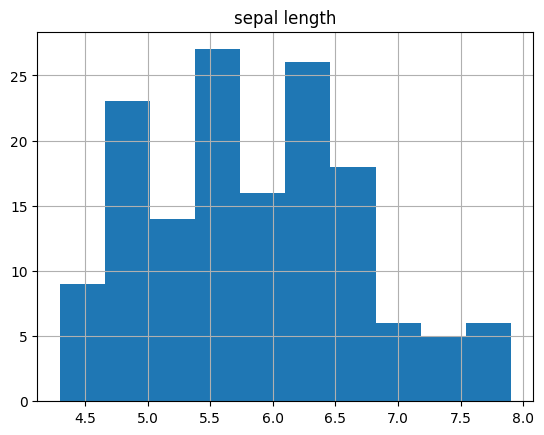

In [158]:
import matplotlib.pyplot as plt
Dataset_3.hist(column='sepal length', bins=10)

array([[<Axes: title={'center': 'sepal width'}>]], dtype=object)

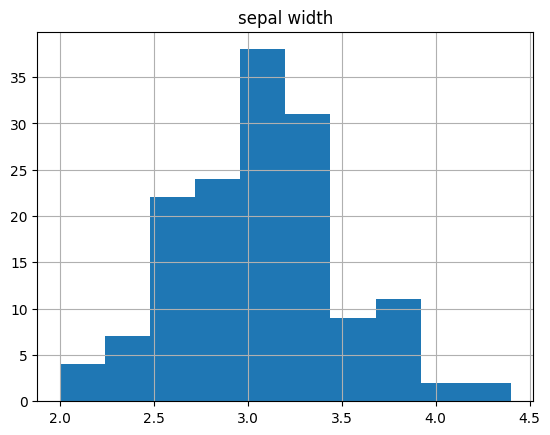

In [159]:
Dataset_3.hist(column='sepal width', bins=10)

array([[<Axes: title={'center': 'petal length'}>]], dtype=object)

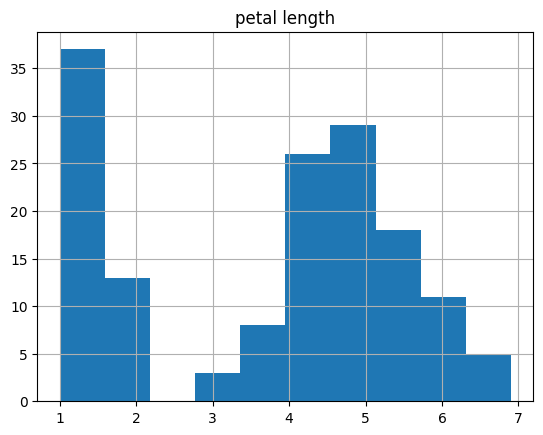

In [160]:
Dataset_3.hist(column='petal length', bins=10)

array([[<Axes: title={'center': 'petal width'}>]], dtype=object)

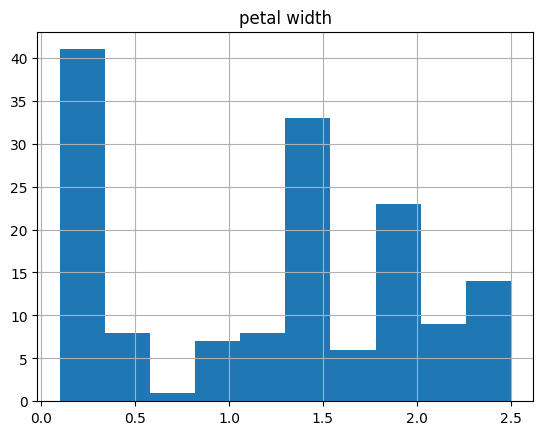

In [161]:
Dataset_3.hist(column='petal width', bins=10)

### q2:

#### pac

In [128]:
Dataset_3_pca = pca.fit_transform(x)
Dataset_3_pca

array([[-2.68420713e+00,  3.26607315e-01, -2.15118370e-02,
         1.00615724e-03],
       [-2.71539062e+00, -1.69556848e-01, -2.03521425e-01,
         9.96024240e-02],
       [-2.88981954e+00, -1.37345610e-01,  2.47092410e-02,
         1.93045428e-02],
       [-2.74643720e+00, -3.11124316e-01,  3.76719753e-02,
        -7.59552741e-02],
       [-2.72859298e+00,  3.33924564e-01,  9.62296998e-02,
        -6.31287327e-02],
       [-2.27989736e+00,  7.47782713e-01,  1.74325619e-01,
        -2.71468037e-02],
       [-2.82089068e+00, -8.21045110e-02,  2.64251085e-01,
        -5.00996251e-02],
       [-2.62648199e+00,  1.70405349e-01, -1.58015103e-02,
        -4.62817610e-02],
       [-2.88795857e+00, -5.70798026e-01,  2.73354061e-02,
        -2.66154143e-02],
       [-2.67384469e+00, -1.06691704e-01, -1.91533300e-01,
        -5.58909660e-02],
       [-2.50652679e+00,  6.51935014e-01, -6.92749958e-02,
        -1.66082478e-02],
       [-2.61314272e+00,  2.15206320e-02,  1.07650353e-01,
      

In [129]:
print(pca.explained_variance_ratio_)

[0.92461621 0.05301557 0.01718514 0.00518309]


In [130]:
print(pca.explained_variance_ratio_.cumsum())

[0.92461621 0.97763178 0.99481691 1.        ]


It shows first principal has 92.46% data so only need one principals is enough and 3 principals has include all data

#### set as DataFrame to show

In [157]:
df_3 = pd.DataFrame(data=Dataset_3_pca, columns=['pca1','pca2','pca3','pca4'])
df_3

,pca1,pca2,pca3,pca4
0,-2.684207,0.326607,-0.021512,0.001006
1,-2.715391,-0.169557,-0.203521,0.099602
2,-2.889820,-0.137346,0.024709,0.019305
3,-2.746437,-0.311124,0.037672,-0.075955
4,-2.728593,0.333925,0.096230,-0.063129
...,...,...,...,...
145,1.944017,0.187415,0.179303,0.425082
146,1.525664,-0.375021,-0.120636,0.255723
147,1.764046,0.078519,0.130784,0.136295
148,1.901629,0.115877,0.722874,0.040873


### q3:

choose one column to Plot hist 

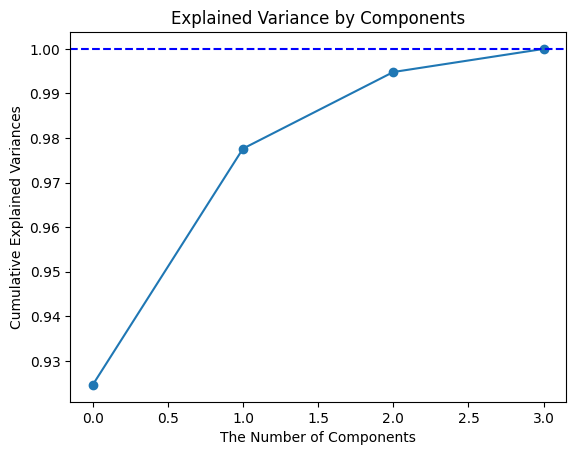

In [132]:
import matplotlib.pyplot as plt
plt.plot(pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='-')#plot variance_sum follow the principal
plt.axhline(y=1, color='b', linestyle='--') # plot a line when y=1 cause this is when principal include 100% data
plt.title('Explained Variance by Components')
plt.xlabel("The Number of Components")
plt.ylabel("Cumulative Explained Variances" )
plt.show()

### q4:

#### PCA the dataset to 2 principal cause we only need 2D

In [133]:
pca1 = PCA(n_components = 2)
df_4 = pd.DataFrame(data=pca1.fit_transform(x),
                    columns=['pc1','pc2'])
df_4

,pc1,pc2
0,-2.684207,0.326607
1,-2.715391,-0.169557
2,-2.889820,-0.137346
3,-2.746437,-0.311124
4,-2.728593,0.333925
...,...,...
145,1.944017,0.187415
146,1.525664,-0.375021
147,1.764046,0.078519
148,1.901629,0.115877


Add y into the DataFrame

In [134]:
finalDF = pd.concat([df_4,Dataset_3[['target']]], axis=1)
finalDF

,pc1,pc2,target
0,-2.684207,0.326607,Iris-setosa
1,-2.715391,-0.169557,Iris-setosa
2,-2.889820,-0.137346,Iris-setosa
3,-2.746437,-0.311124,Iris-setosa
4,-2.728593,0.333925,Iris-setosa
...,...,...,...
145,1.944017,0.187415,Iris-virginica
146,1.525664,-0.375021,Iris-virginica
147,1.764046,0.078519,Iris-virginica
148,1.901629,0.115877,Iris-virginica


#### visulization

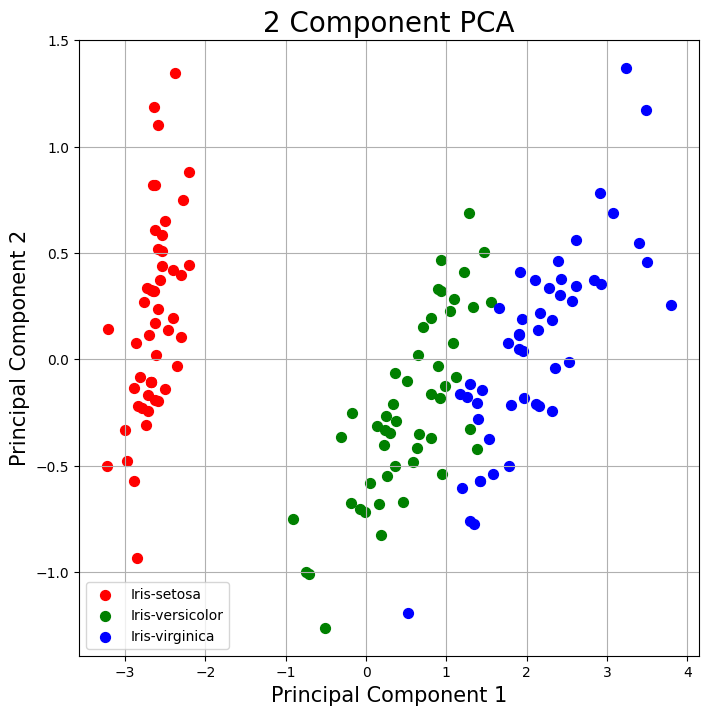

In [135]:
fig = plt.figure(figsize = (8,8)) #size of the plot
ax = fig.add_subplot(1,1,1) #Add an Axes to the current figure or retrieve an existing Axes.
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize=20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDF['target'] == target
    ax.scatter(finalDF.loc[indicesToKeep, 'pc1']
               , finalDF.loc[indicesToKeep, 'pc2']
               , c = color
               , s = 50)
ax.legend(targets)#group point by targets
ax.grid()

### q5: using PCA after standardize the data

#### standardize the data

normalize rescales values to a range between 0 and 1

In [142]:
std_df = preprocessing.normalize(x)
std_df

array([[0.80377277, 0.55160877, 0.22064351, 0.0315205 ],
       [0.82813287, 0.50702013, 0.23660939, 0.03380134],
       [0.80533308, 0.54831188, 0.2227517 , 0.03426949],
       [0.80003025, 0.53915082, 0.26087943, 0.03478392],
       [0.790965  , 0.5694948 , 0.2214702 , 0.0316386 ],
       [0.78417499, 0.5663486 , 0.2468699 , 0.05808704],
       [0.78010936, 0.57660257, 0.23742459, 0.0508767 ],
       [0.80218492, 0.54548574, 0.24065548, 0.0320874 ],
       [0.80642366, 0.5315065 , 0.25658935, 0.03665562],
       [0.81803119, 0.51752994, 0.25041771, 0.01669451],
       [0.80373519, 0.55070744, 0.22325977, 0.02976797],
       [0.786991  , 0.55745196, 0.26233033, 0.03279129],
       [0.82307218, 0.51442011, 0.24006272, 0.01714734],
       [0.8025126 , 0.55989251, 0.20529392, 0.01866308],
       [0.81120865, 0.55945424, 0.16783627, 0.02797271],
       [0.77381111, 0.59732787, 0.2036345 , 0.05430253],
       [0.79428944, 0.57365349, 0.19121783, 0.05883625],
       [0.80327412, 0.55126656,

#### pca

In [151]:
std_df_pca = pd.DataFrame(data = pca1.fit_transform(std_df),
                             columns=["PC1", "PC2"],
                              index=df_3.index ) 

std_df_pca

,PC1,PC2
0,0.301887,-0.000600
1,0.271296,0.040982
2,0.297934,0.001074
3,0.262920,0.001611
4,0.307660,-0.019957
...,...,...
145,-0.165253,-0.020430
146,-0.184989,0.018118
147,-0.162750,-0.016320
148,-0.172966,-0.081527


In [152]:
print(pca.explained_variance_ratio_.cumsum())

[0.96210389 0.98998463 0.99814151 1.        ]


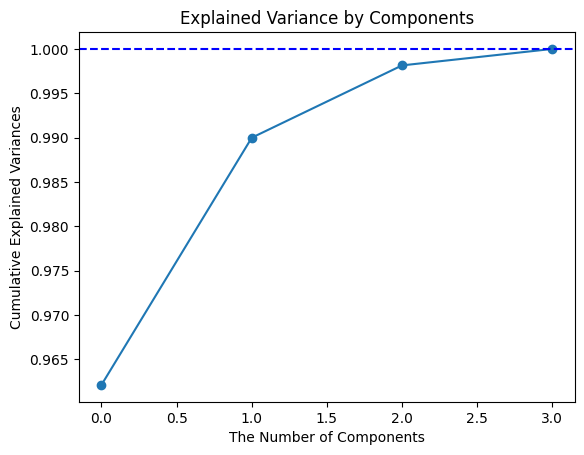

In [153]:
plt.plot(pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='-')#plot variance_sum follow the principal
plt.axhline(y=1, color='b', linestyle='--') # plot a line when y=1 cause this is when principal include 100% data
plt.title('Explained Variance by Components')
plt.xlabel("The Number of Components")
plt.ylabel("Cumulative Explained Variances" )
plt.show()

In [154]:
finalDF = pd.concat([std_df_pca,Dataset_3[['target']]], axis=1)
finalDF

,PC1,PC2,target
0,0.301887,-0.000600,Iris-setosa
1,0.271296,0.040982,Iris-setosa
2,0.297934,0.001074,Iris-setosa
3,0.262920,0.001611,Iris-setosa
4,0.307660,-0.019957,Iris-setosa
...,...,...,...
145,-0.165253,-0.020430,Iris-virginica
146,-0.184989,0.018118,Iris-virginica
147,-0.162750,-0.016320,Iris-virginica
148,-0.172966,-0.081527,Iris-virginica


In [148]:
print(pca.explained_variance_ratio_.cumsum())

[0.96210389 0.98998463 0.99814151 1.        ]


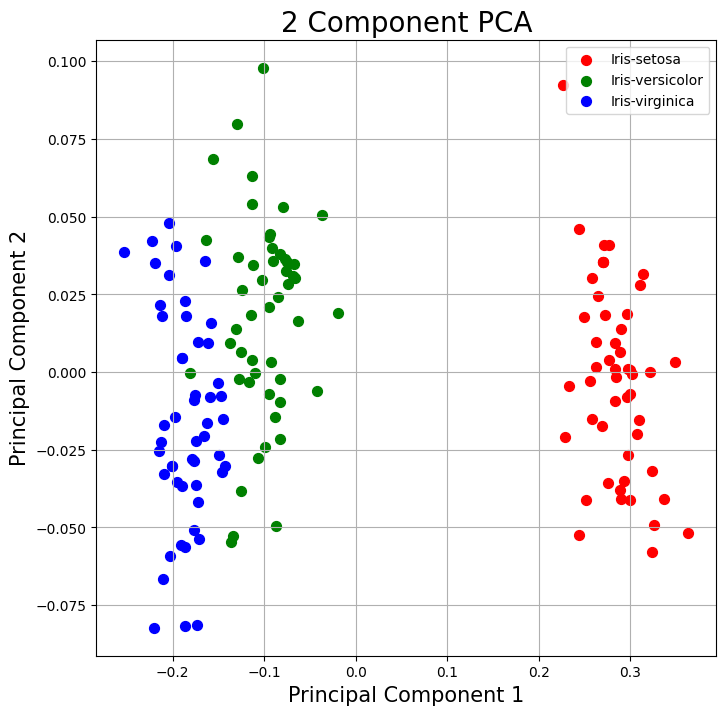

In [156]:
fig = plt.figure(figsize = (8,8)) #size of the plot
ax = fig.add_subplot(1,1,1) #Add an Axes to the current figure or retrieve an existing Axes.
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize=20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDF['target'] == target
    ax.scatter(finalDF.loc[indicesToKeep, 'PC1']
               , finalDF.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets)#group point by targets
ax.grid()